In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip3 install -r 'drive/MyDrive/Colab Notebooks/FaceMaskDetectionProject/requirements.txt'

     |████████████████████████████████| 50.4 MB 16 kB/s 
     |████████████████████████████████| 10.3 MB 12.4 MB/s 
     |████████████████████████████████| 27.4 MB 92 kB/s 
     |████████████████████████████████| 22.3 MB 108 kB/s 
     |████████████████████████████████| 3.1 MB 20.4 MB/s 
     |████████████████████████████████| 7.0 MB 32.2 MB/s 
     |████████████████████████████████| 4.3 MB 47.1 MB/s 
     |████████████████████████████████| 180 kB 46.7 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 111 kB 28.8 MB/s 
     |████████████████████████████████| 489.5 MB 32 kB/s 
     |████████████████████████████████| 489.5 MB 1.2 kB/s 
     |████████████████████████████████| 458.3 MB 13 kB/s 
     |████████████████████████████████| 458.3 MB 13 kB/s 
     |████████████████████████████████| 462 kB 57.5 MB/s 
     |████████████████████████████████| 458.3 MB 13 kB/s 
     |████████████████████████████████| 458.3 MB 2.6 kB/s 
     |█████████

In [55]:
import streamlit as st
from PIL import Image, ImageEnhance
import numpy as np
import cv2
import os

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

path = 'drive/MyDrive/Colab Notebooks/FaceMaskDetectionProject'

In [56]:
import tensorflow as tf
print(tf.__version__)

2.5.2


In [80]:
def load_faces(directory):
  imgs=[]
  for i,filename in os.listdir(directory):
    print(i)
    if(i<5):
      img = cv2.imread(directory+filename)
      imgs.append(image)
  return imgs

def mask_image(image):
    global RGB_img
    # load our serialized face detector model from disk
    print("[INFO] loading face detector model...")
    prototxtPath = path+"/face_detector/deploy.prototxt"
    weightsPath = path+"/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
    net = cv2.dnn.readNet(prototxtPath, weightsPath)

    # load the face mask detector model from disk
    print("[INFO] loading face mask detector model...")
    model = load_model(path+"/mask_detector.model")

    # load the input image from disk and grab the image spatial
    # dimensions
    #image = cv2.imread(path+"/images/pic2.jpg")
    #image = cv2.imread(path+"/dataset/without_mask/without_mask_630.jpg")
    (h, w) = image.shape[:2]

    # construct a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
                                 (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the face detections
    print("[INFO] computing face detections...")
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
        # the detection
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the confidence is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # extract the face ROI, convert it from BGR to RGB channel
            # ordering, resize it to 224x224, and preprocess it
            face = image[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)
            
            # pass the face through the model to determine if the face
            # has a mask or not
            (mask, withoutMask) = model.predict(face)[0]

            # determine the class label and color we'll use to draw
            # the bounding box and text
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

            # include the probability in the label
            label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

            # display the label and bounding box rectangle on the output
            # frame
            
            cv2.putText(image, label, (startX, startY - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
            cv2_imshow(image)
            RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] computing face detections...


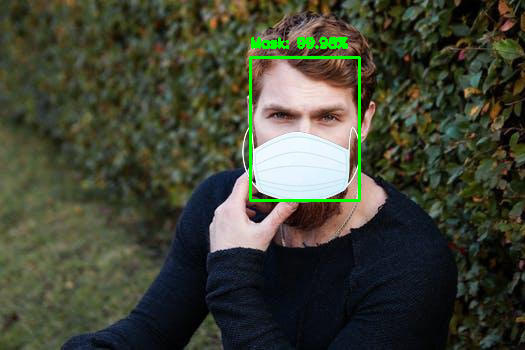

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] computing face detections...


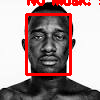

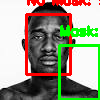

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] computing face detections...


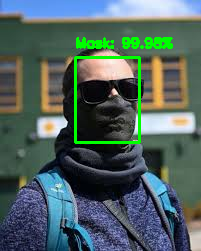

[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] computing face detections...


error: ignored

In [91]:
#images = load_faces(path+'/dataset/with_mask/')
#images.append(load_faces(path+'/dataset/without_mask/'))
directory = path+"/dataset/with_mask/"
for i in range(1,11):
  img = cv2.imread(path+"/dataset/with_mask/with_mask_"+str(i)+".jpg")
  #print(filename)
  mask_image(img)
  img = cv2.imread(path+"/dataset/without_mask/without_mask_"+str(i)+".jpg")
  mask_image(img)
#img = cv2.imread(path+"/dataset/without_mask/without_mask_630.jpg")